In [1]:
#importing libraries 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [2]:
df = pd.read_csv("crop_recommendation.csv")

In [3]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
df.shape

(2200, 8)

In [5]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [6]:
df["label"].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [7]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [8]:
df["label"].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

<AxesSubplot:>

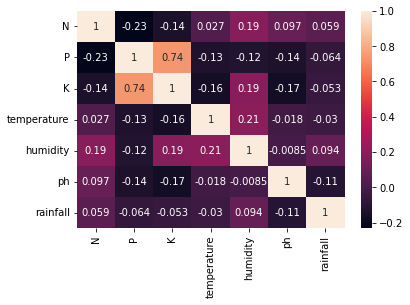

In [9]:
sns.heatmap(df.corr(), annot = True)

### Sepearting features & target

In [10]:
features = df[["N", "P", "K", "temperature", "humidity", "ph", "rainfall"]]
target = df["label"]

In [11]:
#creating list for accuracy to append all different model names

accuracy = []
model_name = []

In [12]:
#splitting into train & test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.25, random_state = 3)

## Trying out different Machine Learning Algorithm

### 1) Decision Tree

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
DecisionTree = DecisionTreeClassifier(criterion = "entropy", random_state = 3, max_depth = 5)

DecisionTree.fit(X_train, y_train)

pred_values = DecisionTree.predict(X_test)
x = metrics.accuracy_score(y_test, pred_values)
accuracy.append(x)
model_name.append("Decision Tree")
print(f"Accuracy of Decision Tree algorithm is {x*100}")
print(classification_report(y_test, pred_values))


Accuracy of Decision Tree algorithm is 89.45454545454545
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        24
      banana       1.00      1.00      1.00        19
   blackgram       0.58      1.00      0.73        19
    chickpea       1.00      0.97      0.98        32
     coconut       0.94      1.00      0.97        30
      coffee       1.00      0.90      0.95        29
      cotton       1.00      1.00      1.00        23
      grapes       1.00      1.00      1.00        27
        jute       0.56      1.00      0.72        22
 kidneybeans       0.00      0.00      0.00        27
      lentil       0.90      1.00      0.95        28
       maize       1.00      0.97      0.98        29
       mango       1.00      0.92      0.96        24
   mothbeans       1.00      0.48      0.65        21
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        29
      orange       1.00 

In [15]:
cv_score = cross_val_score(DecisionTree, features, target, cv =5)*100
print(cv_score)

[93.63636364 91.13636364 91.81818182 86.81818182 93.63636364]


### 2) Guassian Naive Bayes

In [16]:
from sklearn.naive_bayes import GaussianNB

In [17]:
NaiveByes = GaussianNB()

NaiveByes.fit(X_train, y_train)

pred_values = NaiveByes.predict(X_test)
x = metrics.accuracy_score(y_test, pred_values)
accuracy.append(x)
model_name.append("Naive Bayes")
print(f"Accuracy of Naive Byes algorithm is {x*100}")

print(classification_report(y_test, pred_values))

Accuracy of Naive Byes algorithm is 99.45454545454545
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        24
      banana       1.00      1.00      1.00        19
   blackgram       1.00      1.00      1.00        19
    chickpea       1.00      1.00      1.00        32
     coconut       1.00      1.00      1.00        30
      coffee       1.00      1.00      1.00        29
      cotton       1.00      1.00      1.00        23
      grapes       1.00      1.00      1.00        27
        jute       0.88      1.00      0.94        22
 kidneybeans       1.00      1.00      1.00        27
      lentil       1.00      1.00      1.00        28
       maize       1.00      1.00      1.00        29
       mango       1.00      1.00      1.00        24
   mothbeans       1.00      1.00      1.00        21
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        29
      orange       1.00    

In [18]:
cv_score = cross_val_score(NaiveByes, features, target, cv = 5)*100
print(cv_score)

[99.77272727 99.54545455 99.54545455 99.54545455 99.09090909]


### 3) Support Vector Machine (SVM)

In [19]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

In [20]:
norm = MinMaxScaler().fit(X_train)
X_train_norm = norm.transform(X_train)
# transform testing dataabs
X_test_norm = norm.transform(X_test)
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(X_train_norm,y_train)
pred_values = SVM.predict(X_test_norm)
x = metrics.accuracy_score(y_test, pred_values)
accuracy.append(x)
model_name.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(y_test,pred_values))

SVM's Accuracy is:  0.9854545454545455
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        24
      banana       1.00      1.00      1.00        19
   blackgram       1.00      1.00      1.00        19
    chickpea       1.00      1.00      1.00        32
     coconut       1.00      1.00      1.00        30
      coffee       1.00      1.00      1.00        29
      cotton       0.96      1.00      0.98        23
      grapes       1.00      1.00      1.00        27
        jute       0.78      0.95      0.86        22
 kidneybeans       1.00      1.00      1.00        27
      lentil       1.00      1.00      1.00        28
       maize       1.00      0.97      0.98        29
       mango       1.00      1.00      1.00        24
   mothbeans       1.00      1.00      1.00        21
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        29
      orange       1.00      1.00      1.0

In [21]:
cv_score = cross_val_score(SVM, features, target, cv =5)*100
print(cv_score)

[97.95454545 97.5        98.86363636 98.86363636 98.18181818]


#### 4) Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
LogReg = LogisticRegression(random_state = 3)
LogReg.fit(X_train, y_train)

pred_values = LogReg.predict(X_test)

x = metrics.accuracy_score(y_test, pred_values)
accuracy.append(x)
model_name.append("Logistic Regression")
print(f"Logistic Regression accuracy is {x*100}")

print(classification_report(y_test, pred_values))

Logistic Regression accuracy is 95.0909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        24
      banana       0.95      1.00      0.97        19
   blackgram       0.78      0.95      0.86        19
    chickpea       1.00      1.00      1.00        32
     coconut       1.00      1.00      1.00        30
      coffee       0.97      1.00      0.98        29
      cotton       0.88      0.91      0.89        23
      grapes       1.00      1.00      1.00        27
        jute       0.77      0.77      0.77        22
 kidneybeans       1.00      1.00      1.00        27
      lentil       1.00      0.96      0.98        28
       maize       0.92      0.79      0.85        29
       mango       0.96      1.00      0.98        24
   mothbeans       0.89      0.76      0.82        21
    mungbean       0.90      1.00      0.95        19
   muskmelon       1.00      1.00      1.00        29
      orange       1.00      1.0

In [24]:
cv_score = cross_val_score(LogReg, features, target, cv = 5)
print(cv_score)

[0.95       0.96590909 0.94772727 0.96590909 0.94318182]


#### 5) Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
RanFor = RandomForestClassifier(n_estimators = 20, random_state =3 )
RanFor.fit(X_train, y_train)

pred_values = RanFor.predict(X_test)

x = metrics.accuracy_score(y_test, pred_values)
accuracy.append(x)
model_name.append("Random Forest")

print(f"Accuracy of Random Forest is {x*100}")

print(classification_report(y_test, pred_values))

Accuracy of Random Forest is 99.27272727272727
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        24
      banana       1.00      1.00      1.00        19
   blackgram       0.95      1.00      0.97        19
    chickpea       1.00      1.00      1.00        32
     coconut       1.00      1.00      1.00        30
      coffee       1.00      1.00      1.00        29
      cotton       1.00      1.00      1.00        23
      grapes       1.00      1.00      1.00        27
        jute       0.88      1.00      0.94        22
 kidneybeans       1.00      1.00      1.00        27
      lentil       1.00      1.00      1.00        28
       maize       1.00      1.00      1.00        29
       mango       1.00      1.00      1.00        24
   mothbeans       1.00      0.95      0.98        21
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        29
      orange       1.00      1.00 

In [27]:
cv_score = cross_val_score(RanFor, features, target, cv = 5)*100
print(cv_score)

[99.54545455 99.31818182 99.54545455 99.54545455 99.09090909]


## Accuracy Comparison

<AxesSubplot:title={'center':'Accuracy comparison'}, xlabel='Accuracy ', ylabel='Model'>

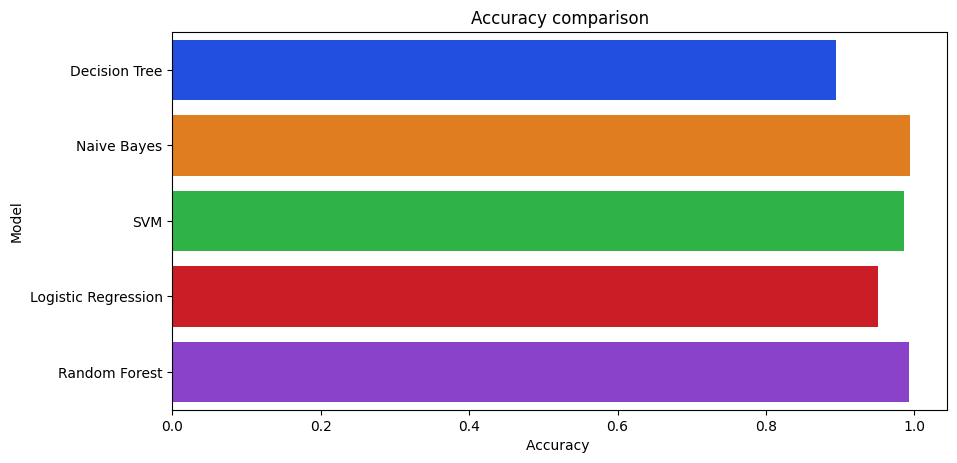

In [31]:
plt.figure(figsize = [10, 5], dpi = 100)
plt.title("Accuracy comparison")
plt.xlabel("Accuracy ")
plt.ylabel("Model")
sns.barplot(x = accuracy, y = model_name, palette = "bright")

In [32]:
accuracy_models = dict(zip(model_name, accuracy))
for i, j in accuracy_models.items():
    print (f"{i} accuracy is {j}")

Decision Tree accuracy is 0.8945454545454545
Naive Bayes accuracy is 0.9945454545454545
SVM accuracy is 0.9854545454545455
Logistic Regression accuracy is 0.9509090909090909
Random Forest accuracy is 0.9927272727272727


In [ ]:
## It can be seen Random Forest & Naive Bayes has somewhat higher accuracy compare to other 

## Making a prediction 

In [33]:
d1 = np.array([[102, 14, 20, 20.14, 80, 6.1, 130]])
pred = DecisionTree.predict(d1)
print(pred)

['coconut']


In [38]:
d2 = np.array([[102, 14, 20, 20.14, 80, 6.1, 130]])
pred = RanFor.predict(d2)
print(pred)

['cotton']


In [39]:
d3 = np.array([[102, 14, 20, 20.14, 80, 6.1, 130]])
pred = SVM.predict(d3)
print(pred)

['rice']


In [40]:
d4 = np.array([[102, 14, 20, 20.14, 80, 6.1, 130]])
pred = NaiveByes.predict(d4)
print(pred)

['maize']


In [41]:
d5 = np.array([[102, 14, 20, 20.14, 80, 6.1, 130]])
pred = LogReg.predict(d5)
print(pred)

['coffee']


In [ ]:
# It can be seen with choosing diffrent model, at same condition it gives different outcome.